## Ejercicio 6.49
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_6.49.png)

In [7]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

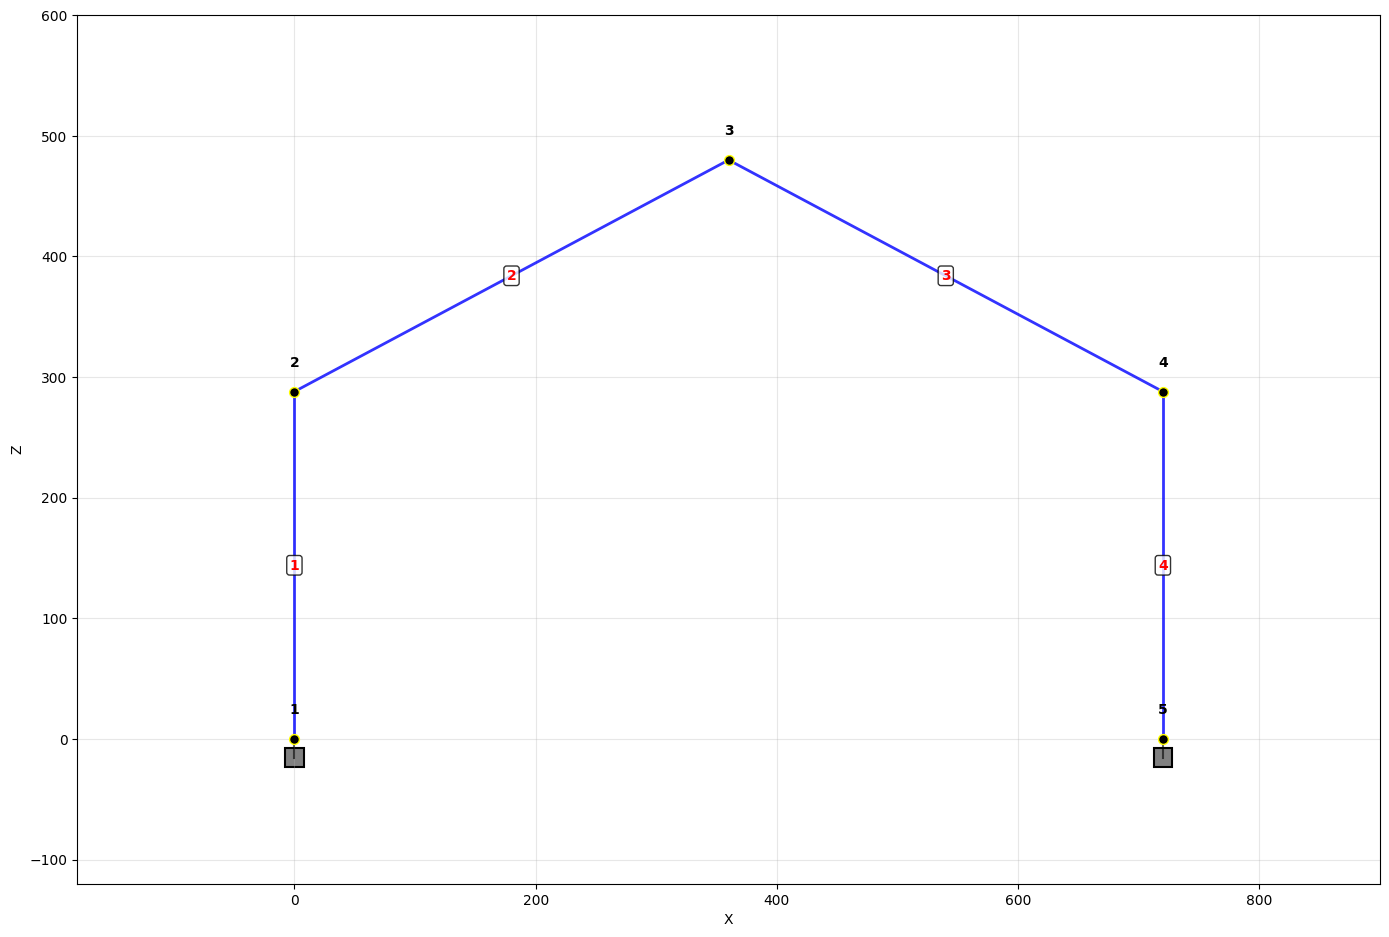

In [8]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 29000 * 10e3
A1 = 20
I1 = 723
A2 = 20.1
I2 = 1830

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=0, z=24*12)
system.defineNode(3, x=30*12, z=(16+24)*12)
system.defineNode(4, x=2*30*12, z=24*12)
system.defineNode(5, x=2*30*12, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(5, ux=True, uz=True, ry=True)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A1, E=E, I=I1)
system.defineElement(2, 2, 3, A=A2, E=E, I=I2)
system.defineElement(3, 4, 3, A=A2, E=E, I=I2)
system.defineElement(4, 5, 4, A=A1, E=E, I=I1)

# Asignación de Cargas
system.assignElement.gravityUniformLoad(2, w=1.5/12)
system.assignElement.gravityUniformLoad(3, w=1.5/12)
system.assignJoint.force(2, fx=50, fz=0, my=0)

# Visualización Inicial
plotter.showFrame()

In [9]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 5
Número de elementos: 4
Grados de libertad totales: 15
Grados de libertad restringidos (desplazamientos conocidos): 6 de 15
GL restringidos: [ 0  1  2 12 13 14]
Grados de libertad libres (fuerzas conocidas): 9 de 15
GL libres: [ 3  4  5  6  7  8  9 10 11]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (9x9):
  |         3 |          4 |          5 |          6 |          7 |          8 |          9 |         10 |         11 |

  |   11249006 |    5893286 |    6165472 |  -11143679 |   -5893286 |   -9001628 |          0 |          0 |          0 |
  |    5893286 |   23375742 |   16878053 |   -5893286 |   -3236853 |   16878053 |          0 |  

In [10]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 288.000
  Área (A): 2.0000e+01
  Módulo elástico (E): 2.9000e+08
  Momento de inercia (I): 7.2300e+02
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=0.000 | S=1.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 20138888.889 |      0.000 |      0.000 | -20138888.889 |      0.000 |      0.000 |
  |      0.000 | 105327.088 | 15167100.694 |      0.000 | -105327.088 | 1516

In [11]:
system.getInfoNodes()

Node 1: (0, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=-12.796, Fz=42.575, My=2693.474

Node 2: (0, 288) - Libre
  Desplazamientos: Ux=2.8978e-04, Uz=-2.1141e-06, Ry=-1.1687e-06
  Fuerzas: Fx=50.000, Fz=0.000, My=0.000

Node 3: (360, 480) - Libre
  Desplazamientos: Ux=3.5004e-04, Uz=-1.2117e-04, Ry=3.8711e-07
  Fuerzas: Fx=0.000, Fz=0.000, My=0.000

Node 4: (720, 288) - Libre
  Desplazamientos: Ux=4.0922e-04, Uz=-2.9508e-06, Ry=-3.8886e-07
  Fuerzas: Fx=0.000, Fz=0.000, My=0.000

Node 5: (720, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=-37.204, Fz=59.425, My=5640.469


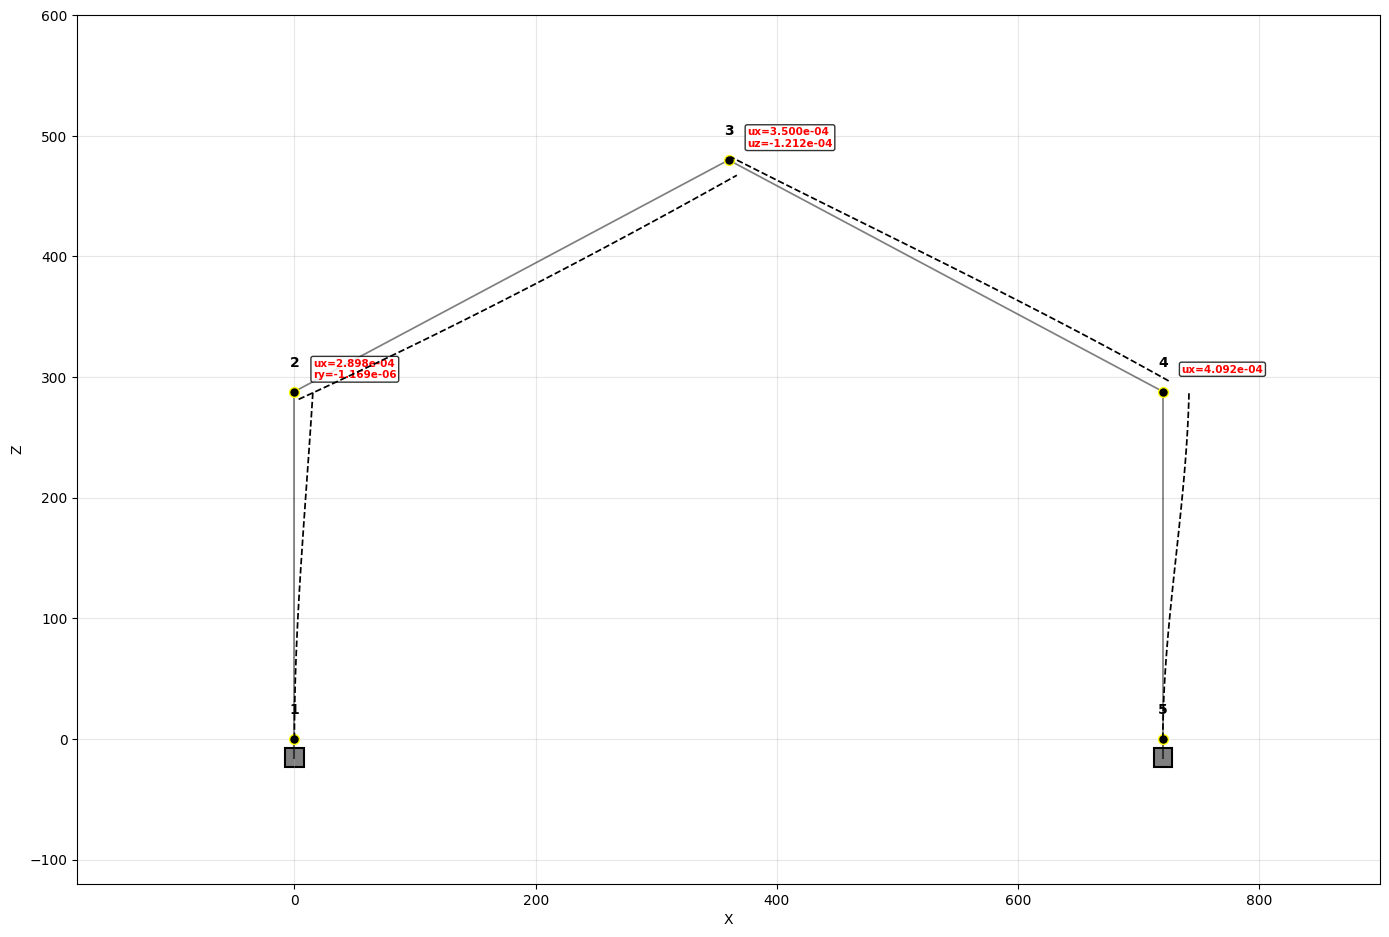

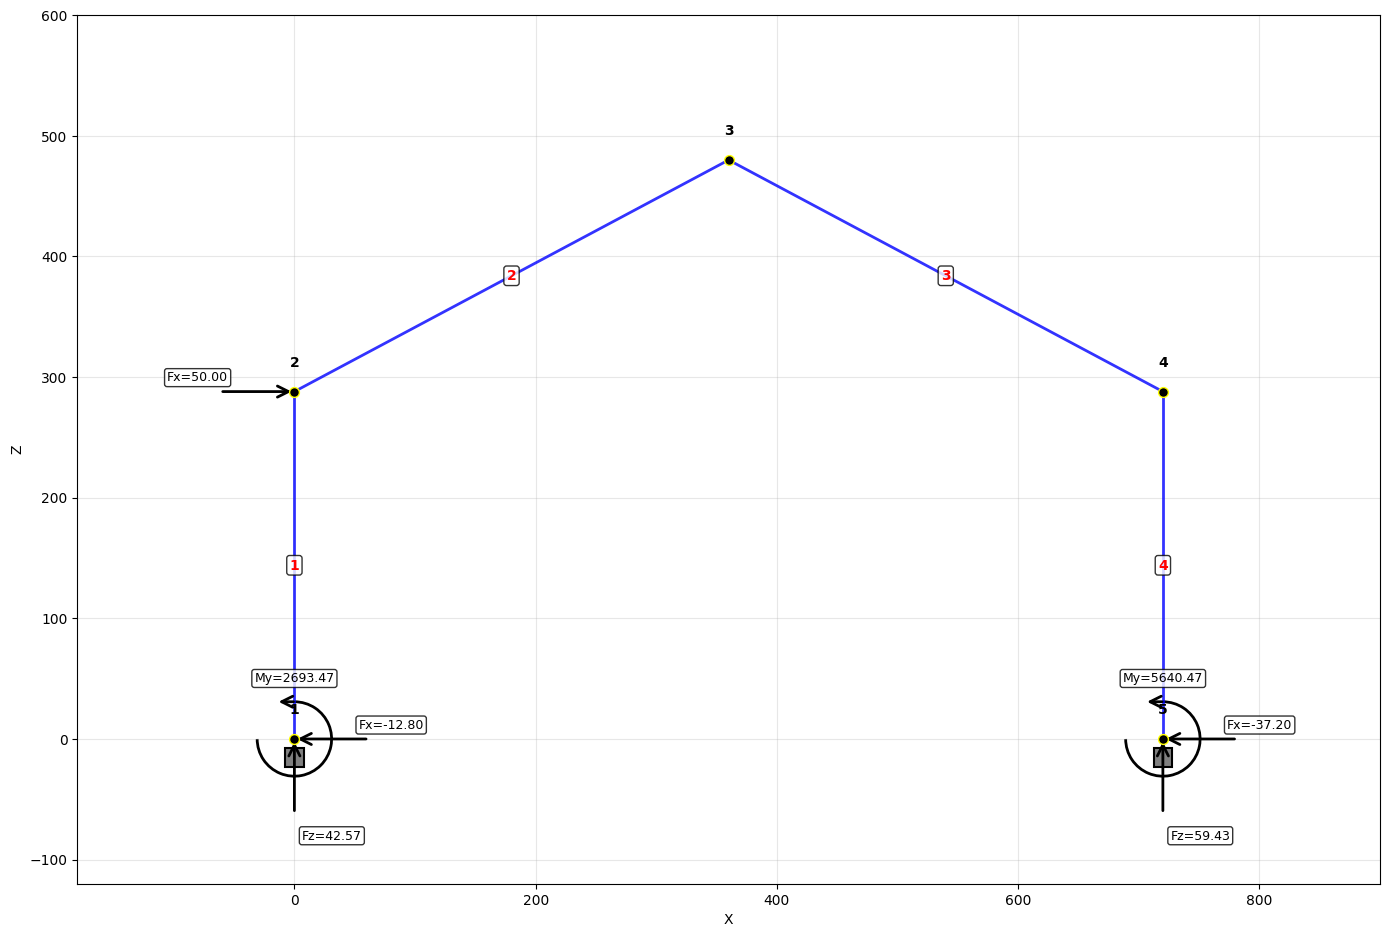

In [12]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.001)
plotter.showReactions()